In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
country_wise_latest = pd.read_csv("../input/corona-virus-report/country_wise_latest.csv")
country_wise_latest = country_wise_latest.set_index("Country/Region")
country_wise_latest.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
Country/Region,,,,,,,,,,,,,,
Afghanistan,34194,971,20882,12341,286,14,35,2.84,61.07,4.65,32324,1870,5.79,Eastern Mediterranean
Albania,3278,85,1875,1318,90,2,43,2.59,57.20,4.53,2752,526,19.11,Europe
Algeria,18242,996,13124,4122,434,8,487,5.46,71.94,7.59,15070,3172,21.05,Africa
Andorra,855,52,803,0,0,0,1,6.08,93.92,6.48,855,0,0.00,Europe
Angola,458,23,117,318,62,1,0,5.02,25.55,19.66,328,130,39.63,Africa


In [3]:
country_wise_latest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, Afghanistan to Zimbabwe
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Confirmed               187 non-null    int64  
 1   Deaths                  187 non-null    int64  
 2   Recovered               187 non-null    int64  
 3   Active                  187 non-null    int64  
 4   New cases               187 non-null    int64  
 5   New deaths              187 non-null    int64  
 6   New recovered           187 non-null    int64  
 7   Deaths / 100 Cases      187 non-null    float64
 8   Recovered / 100 Cases   187 non-null    float64
 9   Deaths / 100 Recovered  187 non-null    float64
 10  Confirmed last week     187 non-null    int64  
 11  1 week change           187 non-null    int64  
 12  1 week % increase       187 non-null    float64
 13  WHO Region              187 non-null    object 
dtypes: float64(4), int64(9), object(

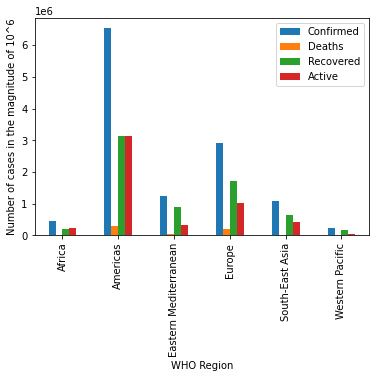

In [4]:
ser = country_wise_latest[["Confirmed","Deaths","Recovered","Active"]].groupby(country_wise_latest["WHO Region"]).sum()
ser.plot(kind="bar")

plt.xlabel("WHO Region")
plt.ylabel("Number of cases in the magnitude of 10^6");

The above plot shows that the maximum number of confirmed cases are currently in the *`Americas`* with the least number of confirmed cases in *`Western Pacific`* region.

With a pie plot a better representation is found as the data is normalized to between 0 and 100.

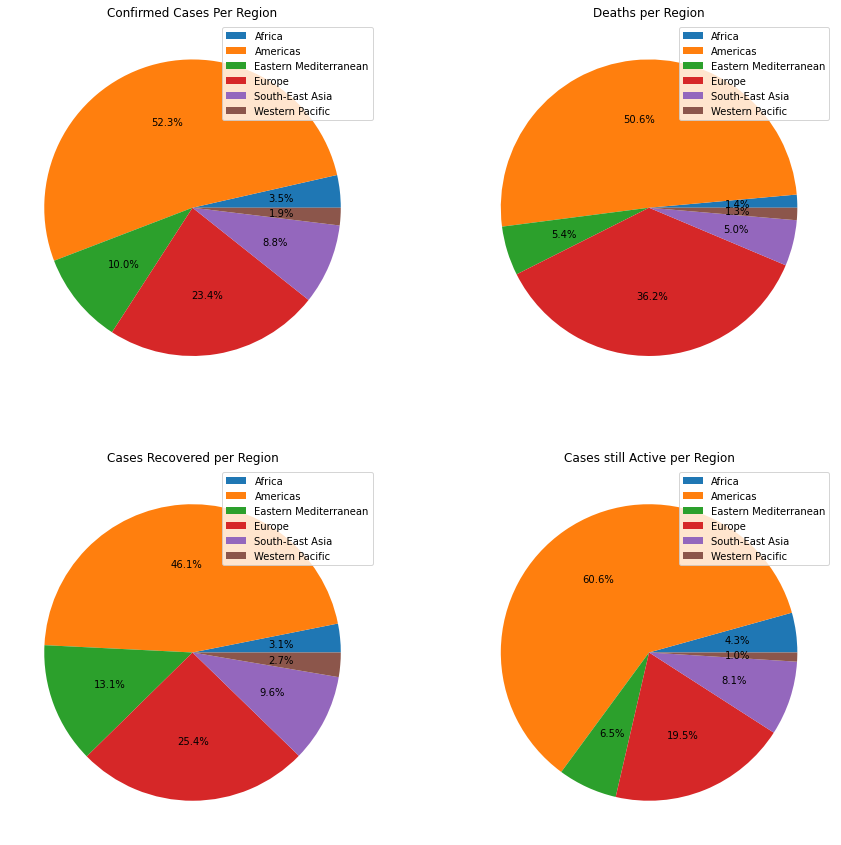

In [5]:
ser1 = country_wise_latest[["Confirmed","Deaths","Recovered","Active"]].groupby(country_wise_latest["WHO Region"]).sum()

fig, ax = plt.subplots(2,2,figsize=(15,15))

ax[0,0].pie(ser1["Confirmed"],autopct="%1.1f%%")
ax[0,0].legend(ser1.index,loc="upper right")
ax[0,0].set_title("Confirmed Cases Per Region")

ax[0,1].pie(ser1["Deaths"],autopct="%1.1f%%")
ax[0,1].legend(ser1.index,loc="upper right")
ax[0,1].set_title("Deaths per Region")

ax[1,0].pie(ser1["Recovered"],autopct="%1.1f%%")
ax[1,0].legend(ser1.index,loc="upper right")
ax[1,0].set_title("Cases Recovered per Region")

ax[1,1].pie(ser1["Active"],autopct="%1.1f%%")
ax[1,1].legend(ser1.index,loc="upper right")
ax[1,1].set_title("Cases still Active per Region");

The maximum number of cases confiremd is the highest in the *Americas* with second highest *Europe*. The high number of confiremd cases could be due to the greater health care system present in those regions with faster testing and documentation of suspected people. *Europe* was also a hotbed for Covid-19 in the early stages of transmission.

The greatest number of active cases, unsuprisingly is in the *Americas*. There is hardly any difference between all 4 types. This indicates that the curev in this region has maybe stabilised for now, and on the downward trend.

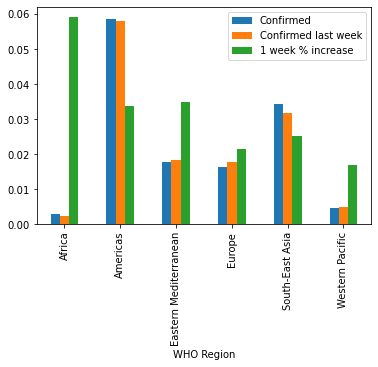

In [219]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_country_wise_latest = country_wise_latest[["Confirmed","Confirmed last week","1 week change","1 week % increase"]]
df_country_wise_latest = scaler.fit_transform(df_country_wise_latest)

df_country_wise_latest = pd.DataFrame(df_country_wise_latest)
df_country_wise_latest["WHO Region"] = country_wise_latest["WHO Region"].values
df_country_wise_latest.columns = ["Confirmed","Confirmed last week","1 week change","1 week % increase","WHO Region"]
df_country_wise_latest[["Confirmed","Confirmed last week","1 week % increase"]].groupby(df_country_wise_latest["WHO Region"]).mean().plot(kind='bar',legend=True);

The data is normalized so as to make a comparison easier.

*Africa* has the highest increase per week. This could be attributed to the recent *Ebola* outbreak in Central Africa with the worst in the Congo.

In the *Americas* the number of cases is increasing but at a steady rate. They could see a downward curve soon, maybe in 3 months.

*Easter Meditarranean* has seen a spike in cases, which is evident in the weekly percentage increase. So has *Europe*, which is evident of a second wave in the region. If there is a lockdown, it should be extended for the safety of the populace.

*Westen Pacific* is currently safe for now compared to the rest of the world, with a slight increase in the cases week to week. Most of the nations in this region are separated by water bodies making a natural barrier for the countries protection. The spike could in the week increase could be due to the second wave in South Korea and surrounding countries. 

*South East Asia* is currently reducing surprisingly given the fact that population in cites are densely packed into small areas. Maybe the lockdown in this region actually helped. Though the data may be inaccurate here due to inadequate testing.

In [38]:
day_wise = pd.read_csv("../input/corona-virus-report/day_wise.csv")
day_wise.set_index("Date",drop=False,inplace=True)
day_wise["Date"] = pd.to_datetime(day_wise["Date"])
day_wise.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
Date,,,,,,,,,,,,
2020-01-22,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
2020-01-23,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2020-01-24,2020-01-24,941,26,35,880,287,8,5,2.76,3.72,74.29,9
2020-01-25,2020-01-25,1434,42,38,1354,493,16,3,2.93,2.65,110.53,11
2020-01-26,2020-01-26,2118,56,51,2011,684,14,13,2.64,2.41,109.80,13


In [39]:
day_wise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 2020-01-22 to 2020-07-10
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    171 non-null    datetime64[ns]
 1   Confirmed               171 non-null    int64         
 2   Deaths                  171 non-null    int64         
 3   Recovered               171 non-null    int64         
 4   Active                  171 non-null    int64         
 5   New cases               171 non-null    int64         
 6   New deaths              171 non-null    int64         
 7   New recovered           171 non-null    int64         
 8   Deaths / 100 Cases      171 non-null    float64       
 9   Recovered / 100 Cases   171 non-null    float64       
 10  Deaths / 100 Recovered  171 non-null    float64       
 11  No. of countries        171 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64

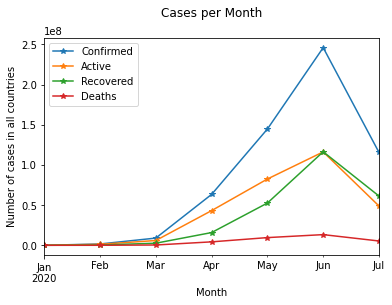

In [221]:
day_wise[["Date","Confirmed","Active","Recovered","Deaths"]].groupby(pd.Grouper(key='Date',freq='M')).sum().plot(marker="*",legend=True)
plt.title("Cases per Month\n")
plt.xlabel("Month")
plt.ylabel("Number of cases in all countries");

The number of cases took started to increase rapidly after March, with a decrease after June, in which most countries had started the 3rd phase of lockdowns. 

Initially Covid-19 was limited to Wuhan, before becoming a pandemic. Even though lockdown in certain countries had been implemented before March, the number of cases spiked due to the 14 day incubation period creating a false safety in certain public places, with suspected patients visiting and spreading the virus. the number of cases increased even when in isolation due the above mentioned incubation period and the symptoms not being adequately addressed.

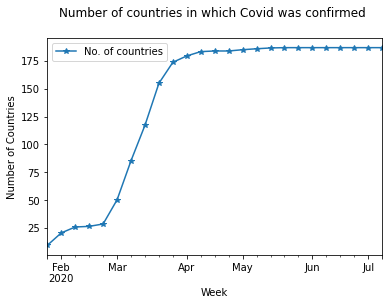

In [223]:
day_wise[["Date","No. of countries"]].groupby(pd.Grouper(key="Date",freq='W')).mean().plot(marker="*",legend=True)


plt.title("Number of countries in which Covid was confirmed \n")
plt.xlabel("Week")
plt.ylabel("Number of Countries");

Now all the countries have cases as compared to the start of the year with less than 25 countries in total till Feburary. From March to April all the countries confiremd at least one Covid-19 case. This could be due to the number of people going from one place to another before the lockdowns were initiated.

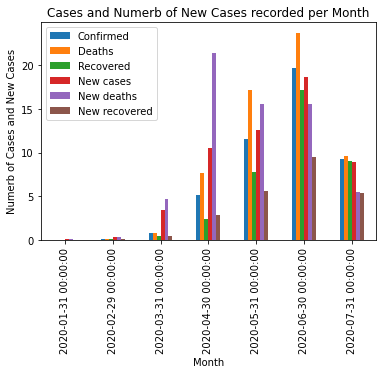

In [233]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = day_wise[["Confirmed","Deaths","Recovered","New cases","New deaths","New recovered"]]
df = scaler.fit_transform(df)

df = pd.DataFrame(df)
df["Date"]=day_wise["Date"].values
df.columns = ["Confirmed","Deaths","Recovered","New cases","New deaths","New recovered","Date"]

df.groupby(pd.Grouper(key="Date",freq='M')).sum().plot(kind="bar",legend=True)

plt.title("Cases and Numerb of New Cases recorded per Month")
plt.xlabel("Month")
plt.ylabel("Numerb of Cases and New Cases");

In April the numerb of *New Deaths* spiked which is evident as there was no Standard Operating Procedure for treating the patients, and the ones with a frail immune system fell prey to the virus.<br>
*New <>* is the numerb of cases as compared to the previous month.

In [86]:
full_grouped = pd.read_csv("../input/corona-virus-report/full_grouped.csv")
full_grouped["Date"] = pd.to_datetime(full_grouped["Date"])
# full_grouped.set_index(["Date","WHO Region"],drop=False,inplace=True)
full_grouped.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [68]:
full_grouped.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 31977 entries, (Timestamp('2020-01-22 00:00:00'), 'Eastern Mediterranean') to (Timestamp('2020-07-10 00:00:00'), 'Africa')
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            31977 non-null  datetime64[ns]
 1   Country/Region  31977 non-null  object        
 2   Confirmed       31977 non-null  int64         
 3   Deaths          31977 non-null  int64         
 4   Recovered       31977 non-null  int64         
 5   Active          31977 non-null  int64         
 6   New cases       31977 non-null  int64         
 7   New deaths      31977 non-null  int64         
 8   New recovered   31977 non-null  int64         
 9   WHO Region      31977 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.5+ MB


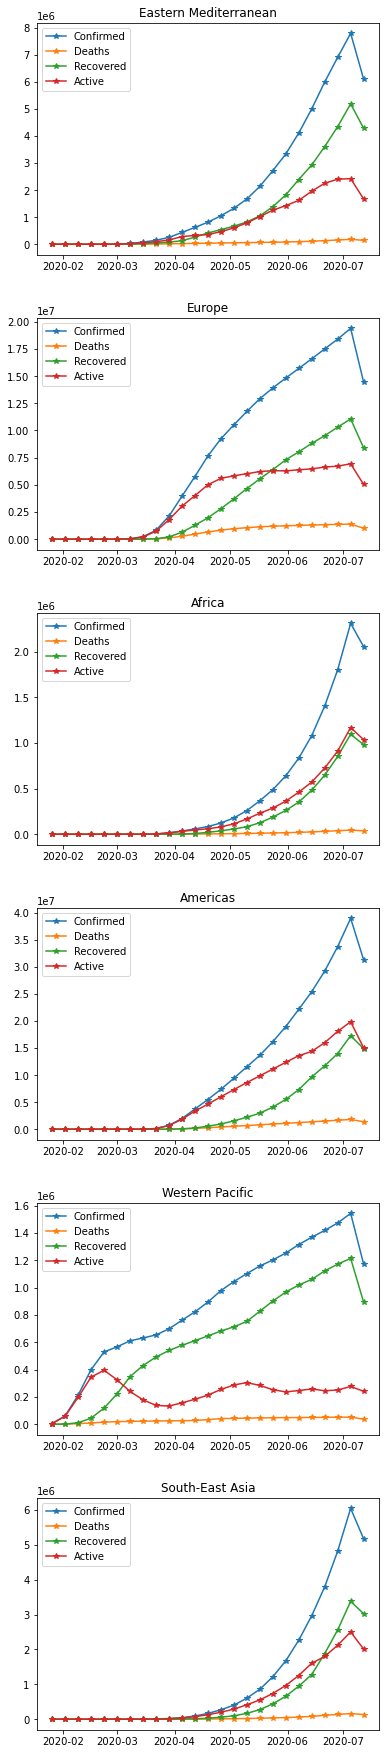

In [201]:
fig,ax = plt.subplots(6,1,figsize=(6,25))
for i,region in enumerate(full_grouped["WHO Region"].unique()):
    ax[i].plot(full_grouped[["Date","Confirmed","Deaths","Recovered","Active"]][full_grouped["WHO Region"]==region].groupby(pd.Grouper(key="Date",freq='W')).sum(),'*-')
    ax[i].legend(["Confirmed","Deaths","Recovered","Active"],loc='upper left')
    ax[i].set_title(region)
    fig.tight_layout(pad=3.0);
    pass

The above 6 graphs show how each region as setup by WHO was affected by the pandemic.

Please do feel free to comment and fork the notebook.